# Giraudoux data set

In [1]:
# Path to tbs

import sys
import os

sys.path.append(os.path.dirname('../'))

## original dissimilarity

In [2]:
import tbs.diss

In [3]:
raw_distance = tbs.diss.load(open("./resources/giraudoux.mat"))

In [4]:
print(tbs.diss.to_string(raw_distance, "lowerl"))

Provinciales                 0.0
LEcoleDesIndifferents       14.0  0.0
SimonLePathetique           19.0  7.0  0.0
SuzanneEtLePacifique        24.0 16.0 26.0  0.0
SiegfriedEtLeLimousin       25.0 16.0 32.0 38.0  0.0
JulietteAuPaysDesHommes     25.0 19.0 29.0 34.0 21.0  0.0
Bella                       26.0 18.0 26.0 40.0 21.0 19.0  0.0
Eglantine                   29.0 17.0 33.0 46.0 35.0 25.0 22.0  0.0
Siegfried                   31.0 22.0 27.0 34.0 26.0 33.0 27.0 30.0  0.0
Amphitryon                  35.0 29.0 34.0 38.0 42.0 40.0 42.0 39.0 28.0  0.0
AventuresDeJeromeBardini    27.0 20.0 31.0 38.0 37.0 24.0 25.0 23.0 30.0 35.0  0.0
Judith                      33.0 28.0 31.0 36.0 37.0 40.0 36.0 38.0 26.0 19.0 35.0  0.0
Intermezzo                  28.0 21.0 31.0 36.0 29.0 30.0 29.0 32.0 21.0 25.0 32.0 28.0  0.0
CombatAvecLAnge             24.0 17.0 20.0 23.0 20.0 18.0 18.0 16.0 23.0 28.0 18.0 25.0 20.0  0.0
LaGuerreDeTroieNAuraPasLieu 34.0 34.0 35.0 41.0 38.0 44.0 42.0 40.0 28.0 19.0 40.0 

## Approximation

### isa 

In [5]:
from tbs.chordal import isa_chordal_diss
from tbs.chordal import isa_totally_balanced_diss

In [6]:
isa_chordal_diss(raw_distance)

False

In [7]:
isa_totally_balanced_diss(raw_distance)

False

### chordal dissimilarity

In [8]:
from tbs.chordal import approximate_to_chordal_diss

diss_chordal = approximate_to_chordal_diss(raw_distance)

In [9]:
isa_chordal_diss(diss_chordal)

True

In [10]:
isa_totally_balanced_diss(diss_chordal)

False

### totally balanced dissimilarity

In [11]:
from tbs.chordal import approximation_to_totally_balanced_diss

diss_totally_balanced = approximation_to_totally_balanced_diss(raw_distance)

In [12]:
isa_totally_balanced_diss(diss_totally_balanced)

True

## Clusters

### Chordal order

In [13]:
from tbs.chordal import chordal_order_partition, chordal_order

In [14]:
order_partition = chordal_order_partition(diss_chordal)

for part in order_partition:
    print(part)

{'Eglantine'}
{'JulietteAuPaysDesHommes'}
{'AventuresDeJeromeBardini'}
{'Bella'}
{'SiegfriedEtLeLimousin'}
{'SuzanneEtLePacifique'}
{'Provinciales'}
{'SimonLePathetique'}
{'LEcoleDesIndifferents'}
{'LaFolleDeChaillot'}
{'Siegfried'}
{'Intermezzo'}
{'CombatAvecLAnge'}
{'Ondine', 'ChoisDesElues'}
{'LaGuerreDeTroieNAuraPasLieu'}
{'Amphitryon'}
{'SodomeEtGomorrhe', 'Electre'}
{'PourLucrece', 'Judith'}
{'ApollonDeBellac', 'CantiqueDesCantiques'}


In [15]:
print(chordal_order(diss_chordal))

['Eglantine', 'JulietteAuPaysDesHommes', 'AventuresDeJeromeBardini', 'Bella', 'SiegfriedEtLeLimousin', 'SuzanneEtLePacifique', 'Provinciales', 'SimonLePathetique', 'LEcoleDesIndifferents', 'LaFolleDeChaillot', 'Siegfried', 'Intermezzo', 'CombatAvecLAnge', 'Ondine', 'ChoisDesElues', 'LaGuerreDeTroieNAuraPasLieu', 'Amphitryon', 'SodomeEtGomorrhe', 'Electre', 'PourLucrece', 'Judith', 'ApollonDeBellac', 'CantiqueDesCantiques']


### Chordal clusters

In [16]:
from tbs.chordal import chordal_context_matrix

cluster_matrix = chordal_context_matrix(diss_chordal)
print(cluster_matrix.transpose())

    Eglantine JulietteAuPaysDesHommes AventuresDeJeromeBardini Bella SiegfriedEtLeLimousin SuzanneEtLePacifique Provinciales SimonLePathetique LEcoleDesIndifferents LaFolleDeChaillot Siegfried Intermezzo CombatAvecLAnge Ondine ChoisDesElues LaGuerreDeTroieNAuraPasLieu Amphitryon SodomeEtGomorrhe Electre PourLucrece Judith ApollonDeBellac CantiqueDesCantiques
0       .                .                       .               .             .                    .                .               .                   .                   .             .         .             .          .          .                    .                  .             .            .         .        .           .                 X          
1       .                .                       .               .             .                    .                .               .                   .                   .             .         .             .          .          .                    .                  .    

drawing: all the elements.

In [17]:
# Matplotlib imports

from matplotlib import pyplot
import matplotlib
import matplotlib.cm

%matplotlib inline

In [18]:
def draw_all(context_matrix):
    colors = matplotlib.cm.rainbow([0. + 1.0 * x / (len(context_matrix.attributes) - 1) for x in range(len(context_matrix.attributes))])

    for y, element in enumerate(context_matrix.elements):
        pyplot.text(0, -y, str(element), ha='right')

    for j in range(len(context_matrix.attributes)):
        for i in range(len(context_matrix.elements)):
            if context_matrix.matrix[i][j]:
                if j > 0 and context_matrix.matrix[i][j-1]:
                    marker = "x"
                else:
                    marker="o"
                pyplot.scatter(j, -i, marker=marker, color=colors[j], edgecolors=None)

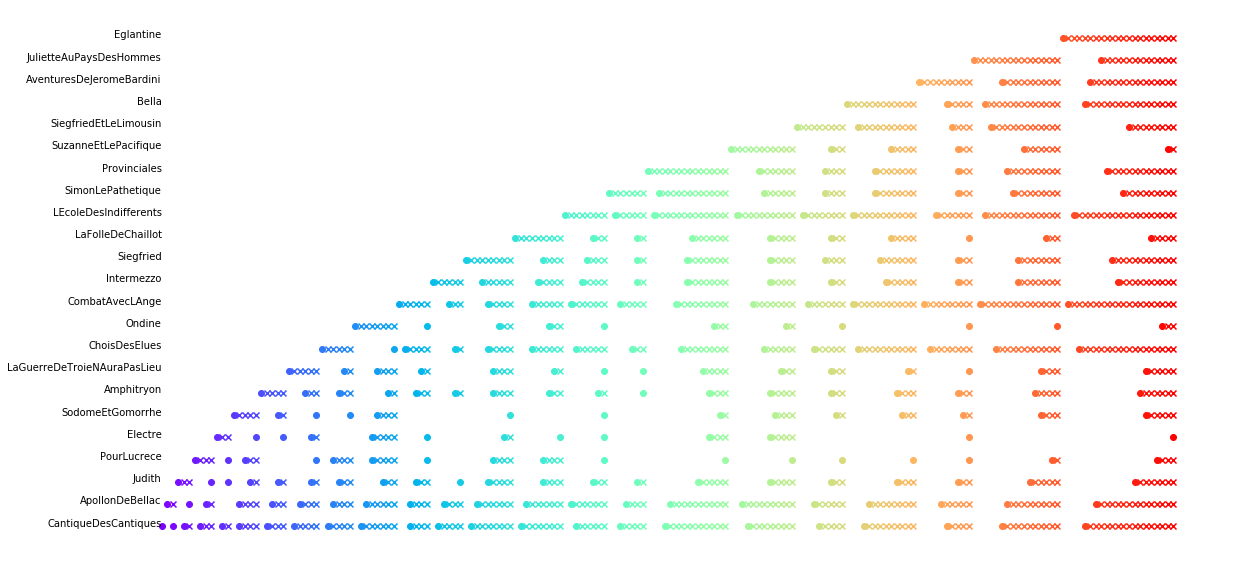

In [19]:
pyplot.figure(figsize=(20, 10))
pyplot.axis('off')

draw_all(cluster_matrix)

### Totally balaced lattice

In [20]:
import tbs.gamma_free
from tbs.gamma_free import GammaFree

In [21]:
context_matrix = GammaFree.from_context_matrix(chordal_context_matrix(diss_totally_balanced))
context_matrix.reorder_doubly_lexical()

In [22]:
print(tbs.gamma_free.to_string(context_matrix))

                           |60 15 56 50 36 46 44 42 41 68 0 28 20 8 23 6 25 32 4 61 57 51 37 62 29 21 7 58 38 47 52 53 63 30 22 3 5 54 64 1 16 69 2 9 10 17 11 24 26 70 33 34 12 27 13 18 39 45 31 40 43 55 59 65 19 14 48 66 35 49 67 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 ⊤ 
---------------------------+--+--+--+--+--+--+--+--+--+--+-+--+--+-+--+-+--+--+-+--+--+--+--+--+--+--+-+--+--+--+--+--+--+--+--+-+-+--+--+-+--+--+-+-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+----+
Electre                    |60|-------------------------------------------------|61|--------|62|----------------------|63|------------|64|--------------------------------------------------------------------|65|--------|66|-----|67|-----|73|-----------------------------------------------------------| ⊤  |
                           +--+--+                                              +-

In [23]:
associated_box_lattice = tbs.gamma_free.box_lattice(context_matrix)

The lattice elements are the boxes. To have the associated number uses boxes from the cluster submodule.
If the matrix is the same as for the creation of the lattice, the associated numbers are the same as for the print.

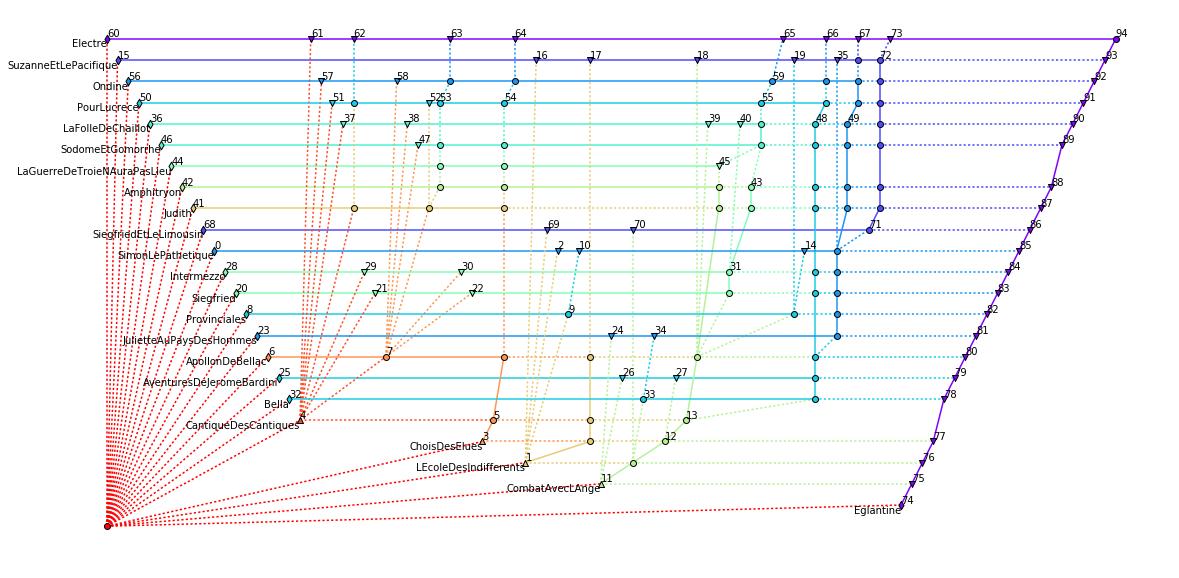

In [24]:
from tbs.gamma_free import draw_to_pyplot

pyplot.figure(figsize=(20, 10))

draw_to_pyplot(context_matrix, pyplot, matplotlib.cm.rainbow)

Each element is represented by:
  - a triangle facing up if it's an element (sup irreducible)
  - a triangle facing down if it's an attribute (inf irreducible)
  - a losange if it is both an element and an attribute (doubly irreducible)
  - a circle otherwise
  
The edges are plain and with the same color if it links two elements from the same hierarchy and dashed otehrwise.